# Loading modules and data

In [2]:
from pyemma.coordinates import tica
from msmbuilder.example_datasets import AlanineDipeptide
import matplotlib.pyplot as plt

trajs = AlanineDipeptide().get().trajectories
import numpy as np

from msmbuilder.featurizer import AtomPairsFeaturizer
pairs = []
for i in range(22):
    for j in range(i):
        pairs.append((j,i))
X = AtomPairsFeaturizer(pairs).fit_transform(trajs)

from msmbuilder.featurizer import DihedralFeaturizer
Y = DihedralFeaturizer().fit_transform(trajs)

/Applications/anaconda/envs/py3.6/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda/envs/py3.6/lib/python3.6/site-packages/sklearn/grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


alanine_dipeptide already is cached


# Perfoming tica on the X features:

In [3]:
obj_x = tica(np.vstack(X), lag = 1, dim = 2).get_output()[0]

In [4]:
obj_x = np.array(obj_x)

Text(0.5,1,'X projection onto first two tICs')

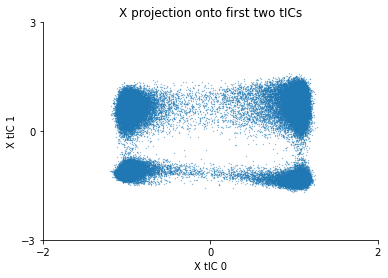

In [5]:
ax = plt.subplot(111)
plt.scatter(obj_x.T[0], obj_x.T[1], s=0.1, alpha=0.7)
plt.xlabel('X tIC 0')
plt.ylabel('X tIC 1')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([-2,0,2])
plt.yticks([-3,0,3])
plt.title('X projection onto first two tICs')

# Performing tica on Y features

In [7]:
obj_y = tica(np.vstack(Y), lag = 1, dim = 2).get_output()
print (type(obj_y))

<class 'list'>


In [8]:
obj_y = np.array(obj_y)

Text(0.5,1,'Y projection onto first two tICs')

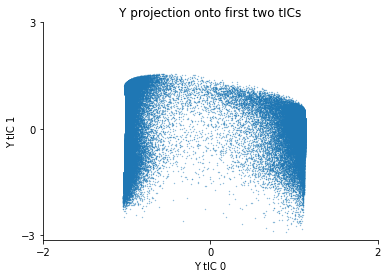

In [9]:
ax = plt.subplot(111)
plt.scatter(obj_y.T[0], obj_y.T[1], s=0.1, alpha=0.7)
plt.xlabel('Y tIC 0')
plt.ylabel('Y tIC 1')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([-2,0,2])
plt.yticks([-3,0,3])
plt.title('Y projection onto first two tICs')

# Graphing (tIC0_X, tIC0_Y) 

Text(0.5,1,'(X,Y) projection onto first two tICs')

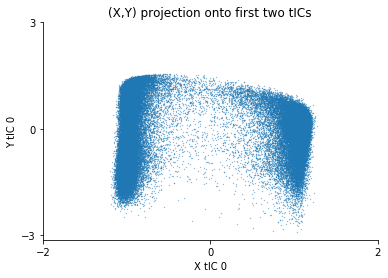

In [10]:
ax = plt.subplot(111)
plt.scatter(obj_x.T[0], obj_y.T[1], s=0.1, alpha=0.7)
plt.xlabel('X tIC 0')
plt.ylabel('Y tIC 0')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plt.xticks([-2,0,2])
plt.yticks([-3,0,3])
plt.title('(X,Y) projection onto first two tICs')